In [1]:
from Binaries import *

Container = Ensemble("120_LSTM_3L_Downsampled_AllEnergies_5_0VEM", supress_print = True)

BestModel = Container.get_best_model("final_predictions")
BestModel.signal_efficiency("final_predictions")

In [23]:
# plot the classifiers efficiency in terms of deposited signal    
def signal_efficiency(self, dataset : str, **kwargs) -> None :

    # load dataset in it's completeness
    if self.name == "HardwareClassifier":
        save_files = \
        {
            "TP" : f"/cr/data01/filip/models/{self.name}/ROC_curve/{dataset}/true_positives.csv",
            "TN" : f"/cr/data01/filip/models/{self.name}/ROC_curve/{dataset}/true_negatives.csv",
            "FP" : f"/cr/data01/filip/models/{self.name}/ROC_curve/{dataset}/false_positives.csv",
            "FN" : f"/cr/data01/filip/models/{self.name}/ROC_curve/{dataset}/false_negatives.csv"
        }
    else:
        save_files = \
        {
            "TP" : f"/cr/data01/filip/models/{self.name}/model_{self.epochs}/ROC_curve/{dataset}/true_positives.csv",
            "TN" : f"/cr/data01/filip/models/{self.name}/model_{self.epochs}/ROC_curve/{dataset}/true_negatives.csv",
            "FP" : f"/cr/data01/filip/models/{self.name}/model_{self.epochs}/ROC_curve/{dataset}/false_positives.csv",
            "FN" : f"/cr/data01/filip/models/{self.name}/model_{self.epochs}/ROC_curve/{dataset}/false_negatives.csv"
        }

    if os.stat(save_files['TN']).st_size:
        TN = np.loadtxt(save_files['TN'], usecols = [8])
    else: TN = np.array([])

    if os.stat(save_files['FP']).st_size:
        FP = np.loadtxt(save_files['FP'], usecols = [8])
    else: FP = np.array([])

    if os.stat(save_files['TP']).st_size:
        TP = np.loadtxt(save_files['TP'], usecols = [8])
    else: TP = np.array([])
    
    if os.stat(save_files['FN']).st_size:
        FN = np.loadtxt(save_files['FN'], usecols = [8])
    else: FN = np.array([])

    signal_bins = np.geomspace(5e-2, 1e3, kwargs.get("n_bins", 100))

    n_hit, _ = np.histogram(TP, bins = signal_bins)
    n_miss, _ = np.histogram(FN, bins = signal_bins)      

    plt.scatter(0.5 * (signal_bins[1:] + signal_bins[:-1]), n_hit / (n_hit + n_miss), c = kwargs.get("color", "steelblue"), label = kwargs.get("label", None))
    

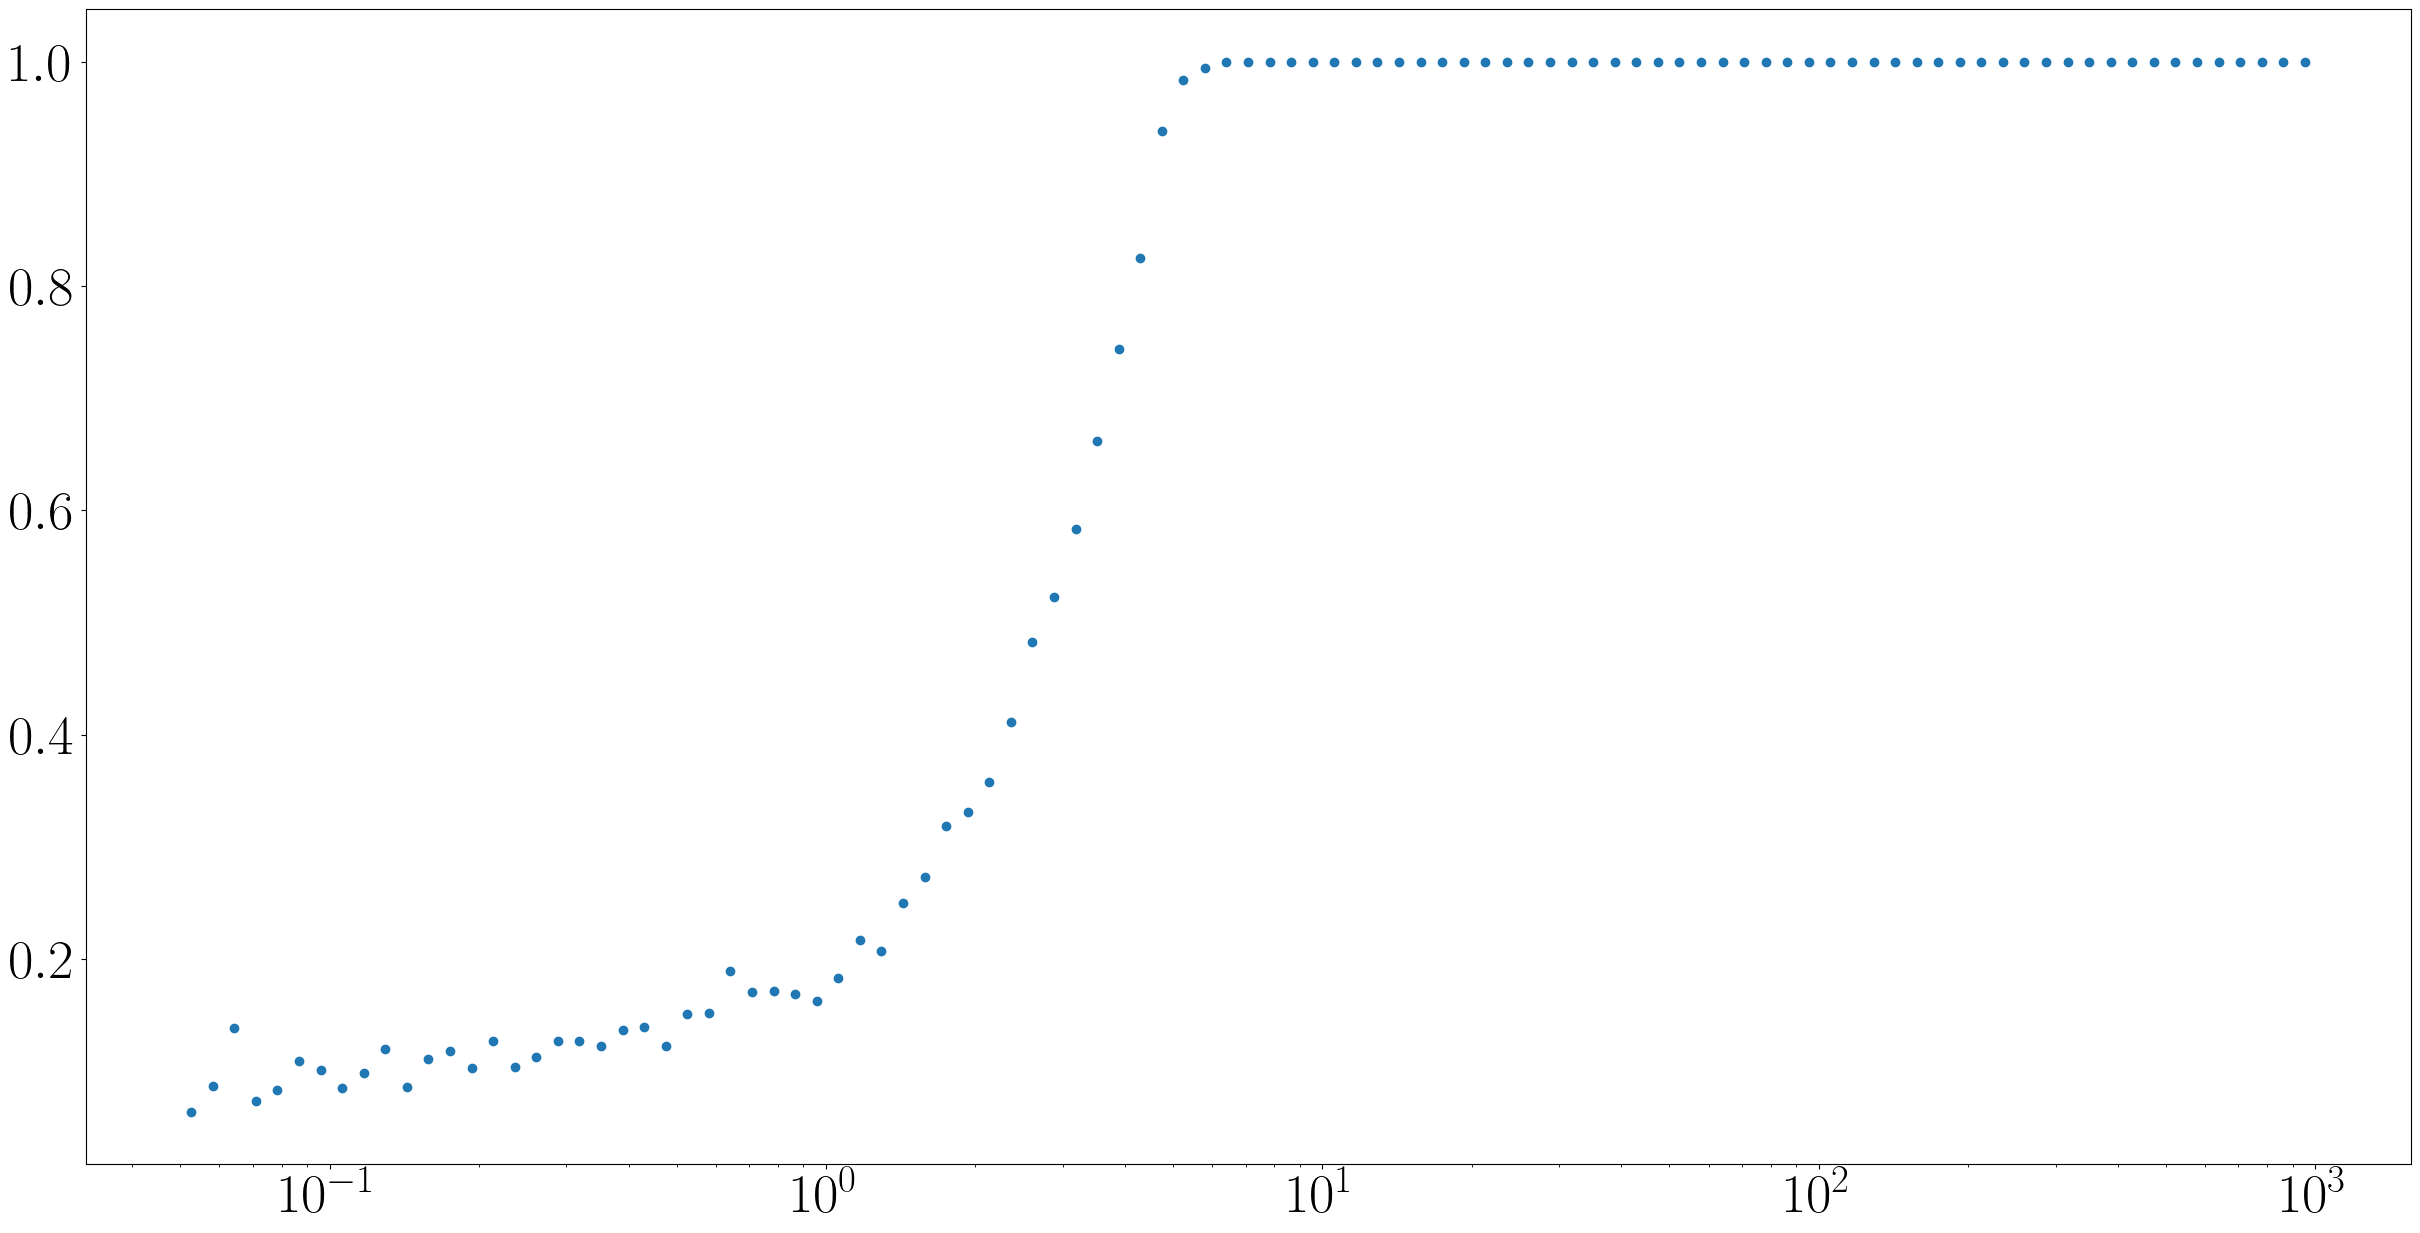

In [25]:
signal_efficiency(BestModel, "final_predictions")
plt.xscale("log")